In [1]:
# import ROOT as r
import numpy as np
import pandas as pd
# import pickle
# import sys
# from ShipGeoConfig import ConfigRegistry
from rootpyPickler import Unpickler
import shipLHC_conf as sndDet_conf
import SndlhcGeo
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize
import time
import matplotlib.colors as colors
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.colors import TwoSlopeNorm

Welcome to JupyROOT 6.26/10


### Load the energy reco results

In [2]:
depths = [291,295,304,308,317,321,330,334,343,347]
energies = [50,100,200,300,400,500,750,1000,1250,1500,2000]

In [3]:
true_e = np.array([])
for e in energies:
    for i in range(0,100):
    
        true_e = np.append(true_e,e)

In [4]:
bias = []
res = []
for depth in depths:
    
    reco_e_x = pd.read_csv("/eos/home-i02/s/skatsaro/PGsim/depth_{}/energy_reco/reco_e_x.txt".format(depth))
    reco_e_x = np.ndarray.flatten(reco_e_x.values)
#     reco_avg = np.average(reco_e_x.reshape(11,100),axis=1)
#     reco_std = np.std(reco_e_x.reshape(11,100),axis=1)
    
    bias_e = np.average(((reco_e_x-true_e)/true_e).reshape(11,100),axis=1)
    res_e = np.std(((reco_e_x-true_e)/true_e).reshape(11,100),axis=1)
    bias.append(bias_e)
    res.append(res_e)
#     resolution.append(reco_std)

In [5]:
bias = np.array(bias)

In [6]:
res = np.array(res)

### Make the reco plots 

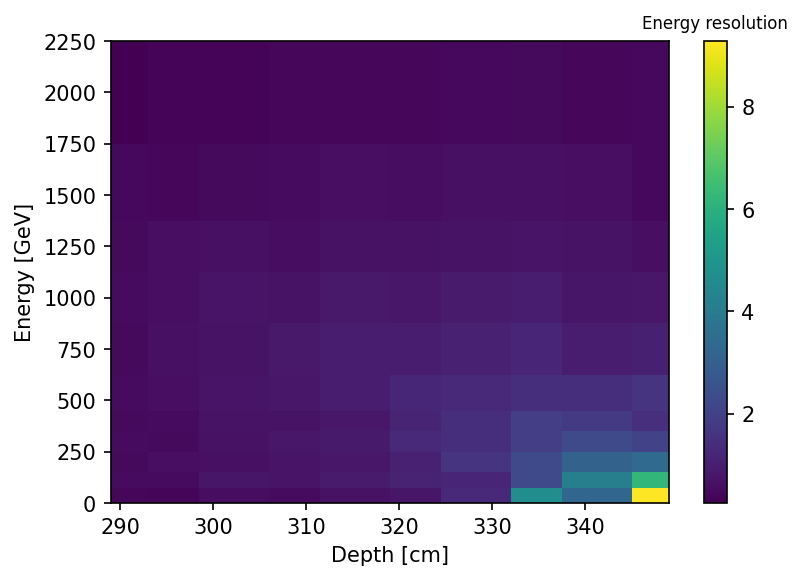

In [7]:
###
# Make bias and resolution plot by just changing the variable in weights
###

_, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4), dpi=150)


plt.hist2d(np.repeat(depths,11),np.tile(energies,10),bins = [[289,293,298.5,306,311.5,319,324.5,332,337.5,345,349],
                                                             [0,75,150,250,350,450,625,875,1125,1375,1750,2250]],
                                                             weights=np.ndarray.flatten(np.array(res)))
# plt.xticks(np.linspace(1,5.5,10))
plt.xlabel("Depth [cm]")
plt.ylabel("Energy [GeV]")

# plt.set_cmap("bwr") 
  
clb = plt.colorbar(ax=ax)
clb.ax.set_title("Energy resolution", fontsize=8)


# plt.colorbar()
# plt.savefig("Res reco energy, all depths and energies (updated).png",bbox_inches="tight")

plt.show()

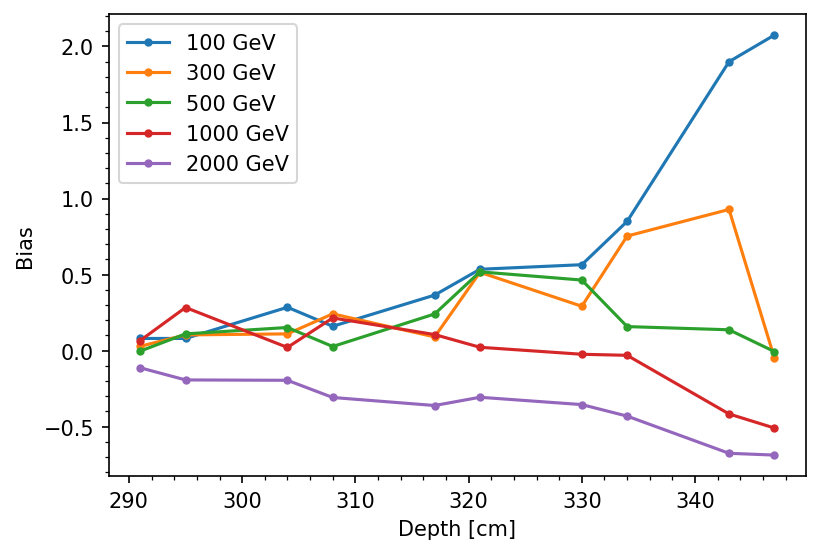

In [11]:
###
# Make bias and resolution plot by just changing the variable in plt.plot
###

energies = [50,100,200,300,400,500,750,1000,1250,1500,2000]
energies_sub = [100,300,500,1000,2000]
legend_energy = [str(x) + " GeV" for x in energies_sub]

_, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4), dpi=150)
for num_e, energy in enumerate(energies_sub):
    

    plt.plot(depths,bias[:,np.where(np.array(energies)==energy)[0]],marker=".")
#     plt.errorbar(depths,deltas[:,num_e],yerr=stds[:,num_e]/2,linestyle="")
    plt.xlabel("Depth [cm]")
    plt.ylabel("Bias")
#     plt.title("Energy reco. {} GeV".format(energy))
    ax.yaxis.get_ticklocs(minor=True)
    ax.minorticks_on()
    
plt.legend(legend_energy)
# plt.savefig("Bias reco energy, [100, 300, 500, 1000, 2000] GeV, all depths (updated).png",bbox_inches="tight")
plt.show()

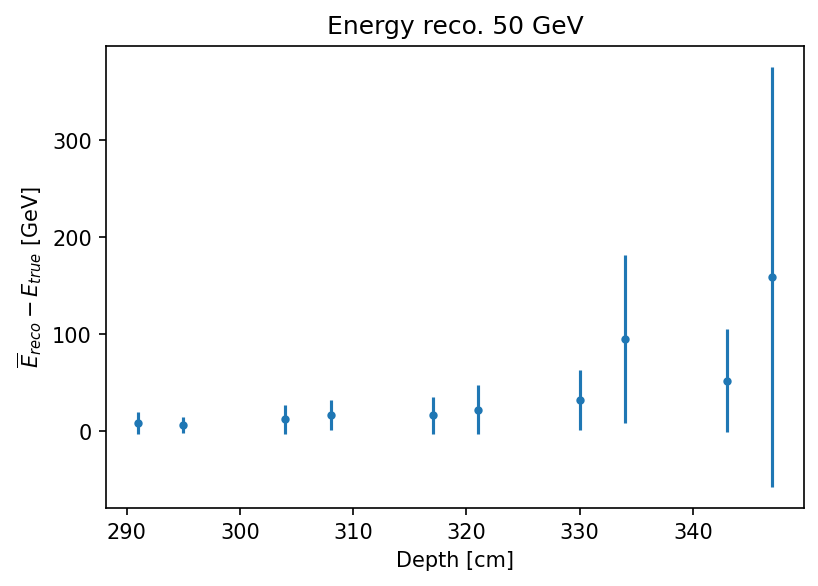

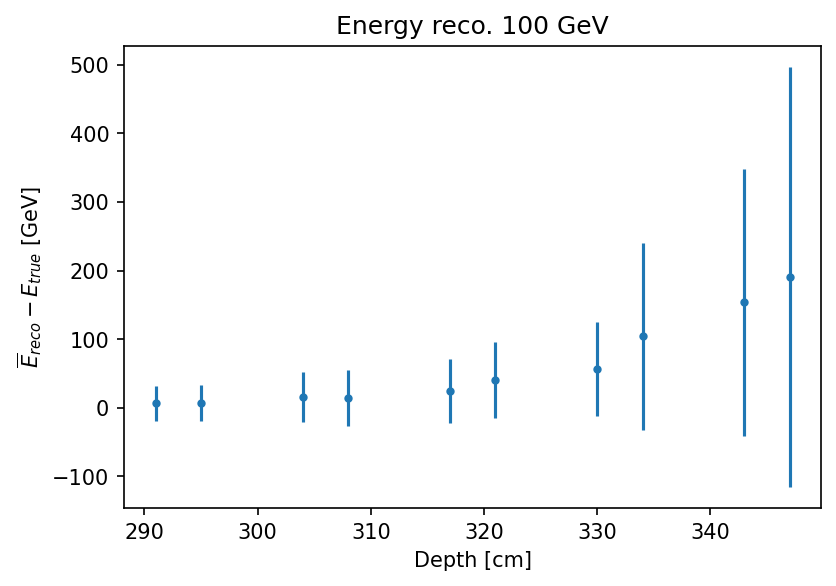

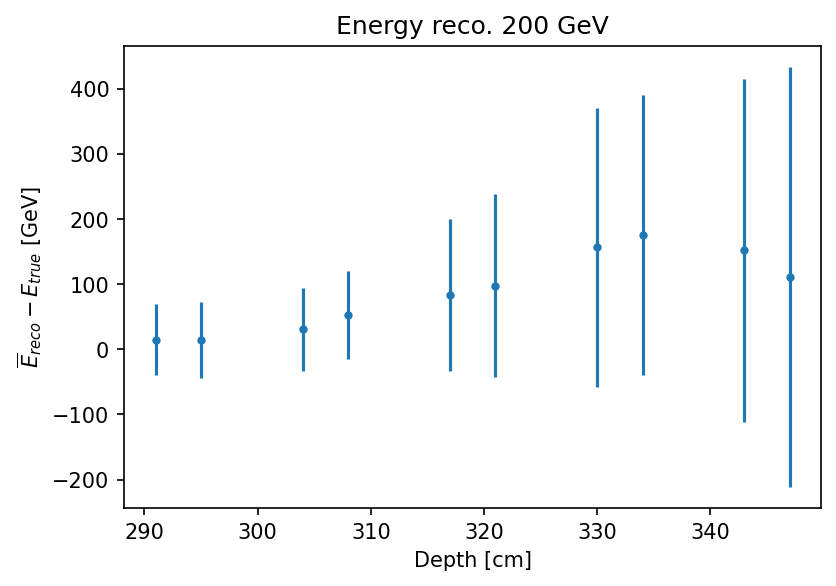

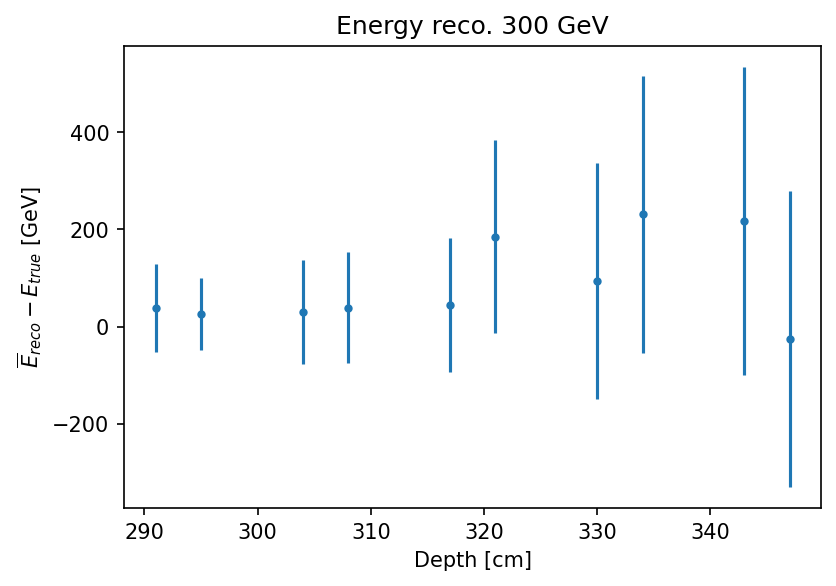

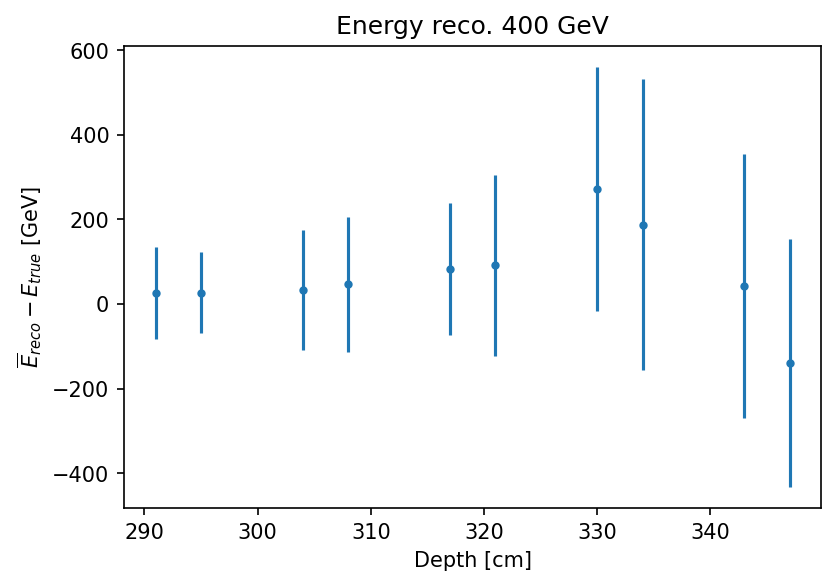

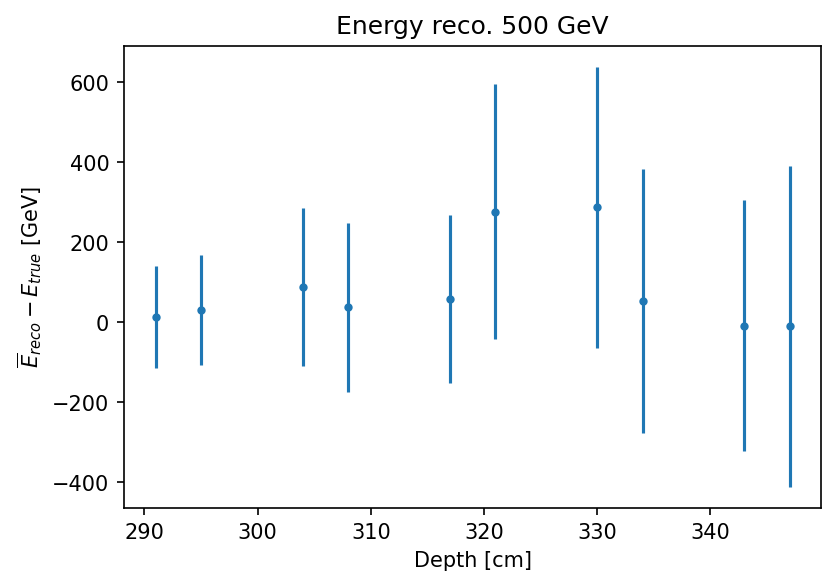

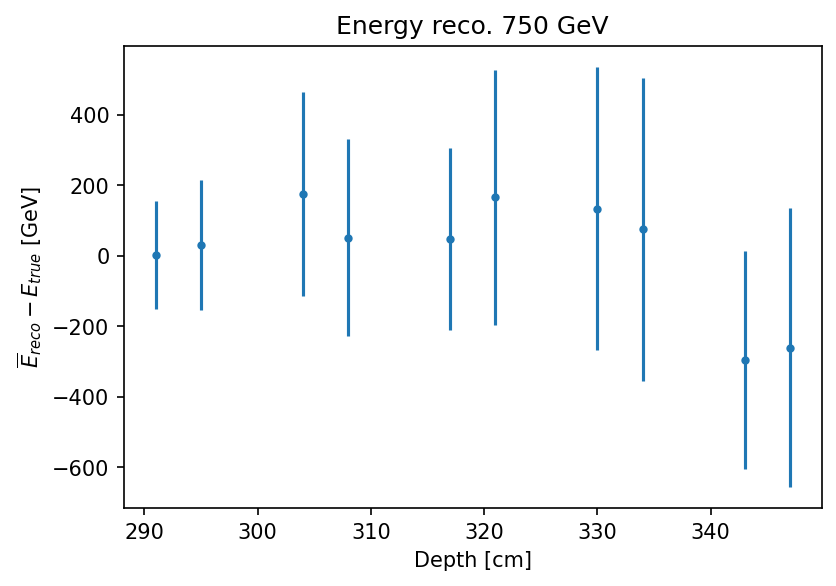

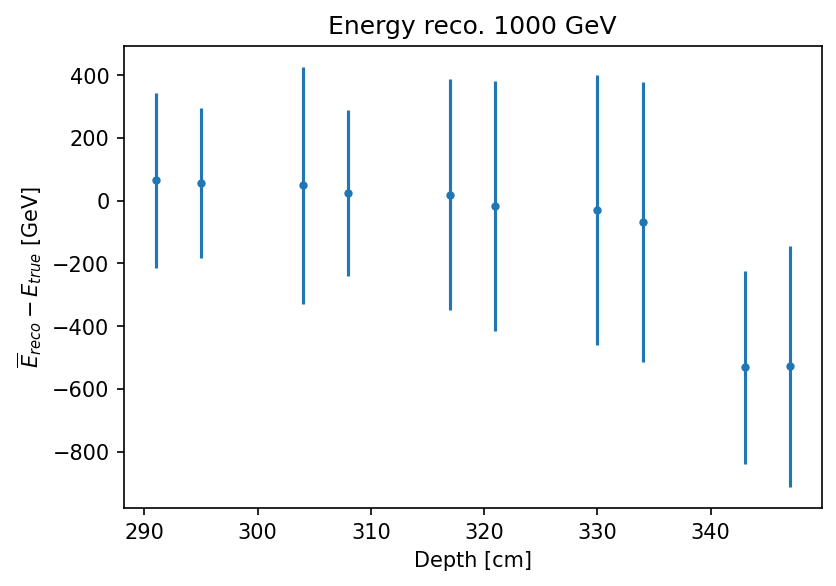

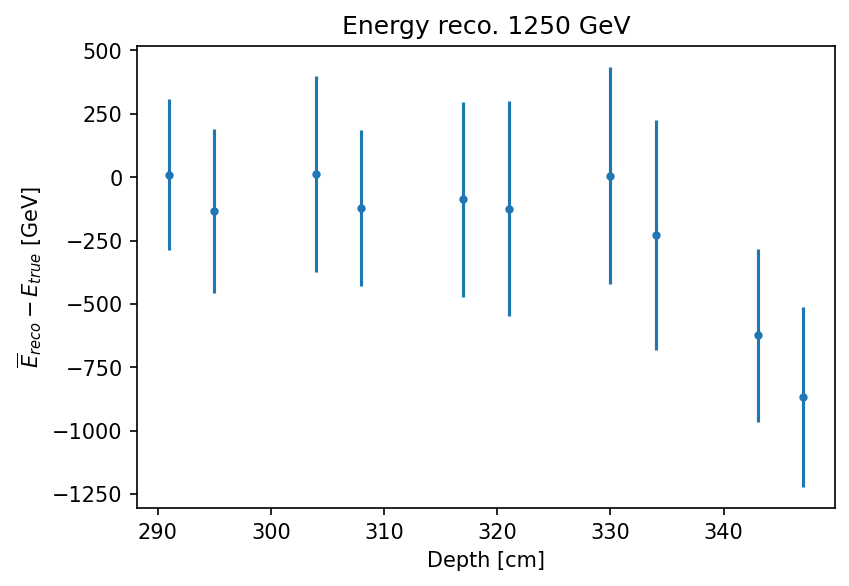

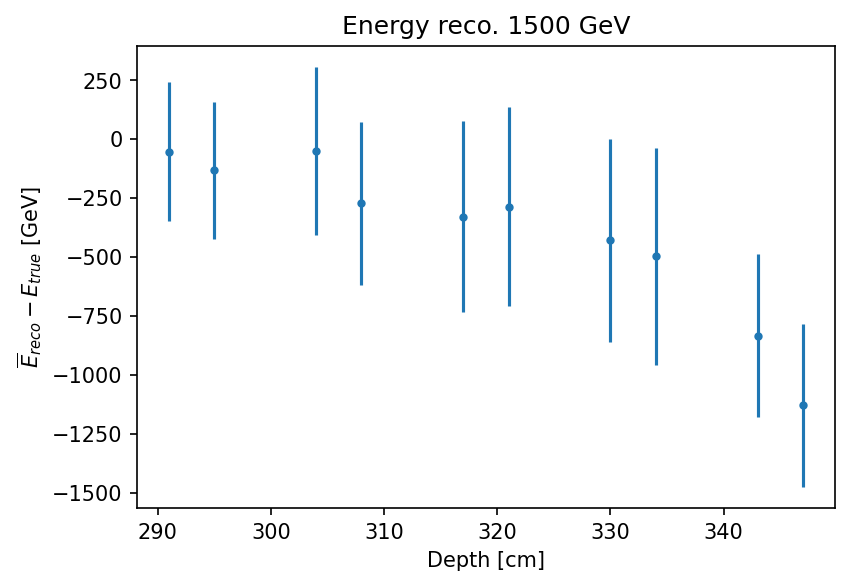

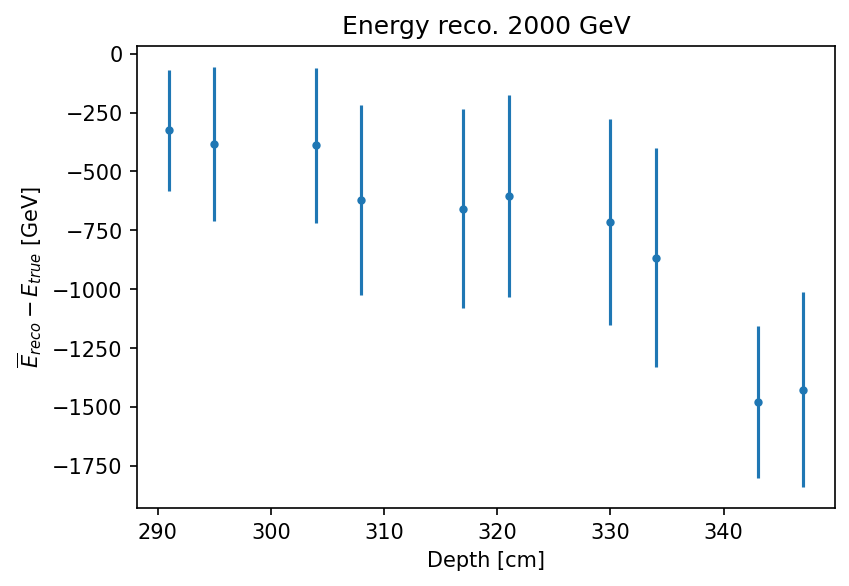

In [50]:
for num_e, energy in enumerate(energies):
    _, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4), dpi=150)

    plt.scatter(depths,deltas[:,num_e],marker=".")
    plt.errorbar(depths,deltas[:,num_e],yerr=stds[:,num_e]/2,linestyle="")
    plt.xlabel("Depth [cm]")
    plt.ylabel("$\overline{E}_{reco}-E_{true}$ [GeV]")
    plt.title("Energy reco. {} GeV".format(energy))
    plt.savefig("Delta reco energy, {} GeV, all depths.png".format(energy),bbox_inches="tight")
    plt.show()

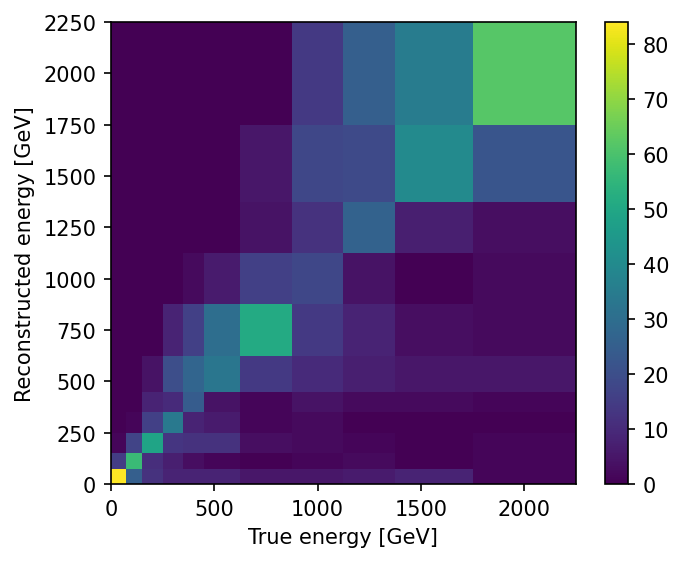

In [46]:
bins = [0,75,150,250,350,450,625,875,1125,1375,1750,2250]
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4), dpi=150)
plt.hist2d(true_e,reco_e_x,bins = [bins,bins])
plt.ylabel("Reconstructed energy [GeV]")
plt.xlabel("True energy [GeV]")

# plt.colorbar(title="Number of events")
plt.colorbar()

# plt.tight_layout()
# plt.savefig("Energy_reco_z_304(100 events per e), x only.png",bbox_inches="tight")
# plt.xticks(energies)
# plt.yticks(energies)
plt.show()

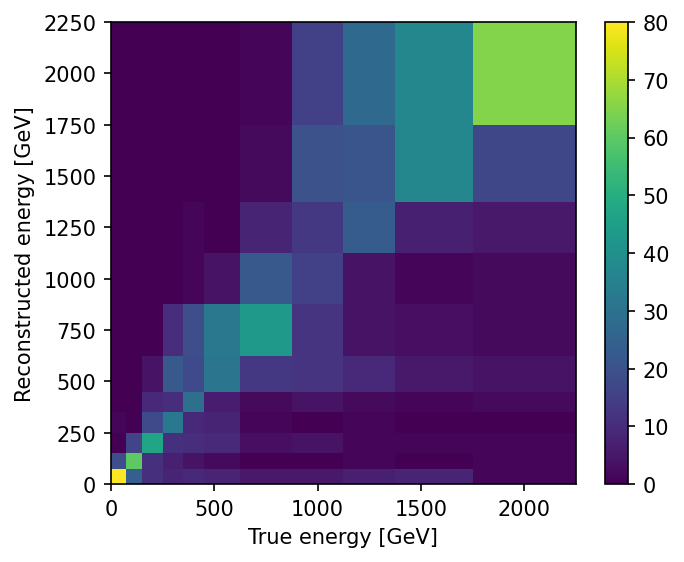

In [47]:
bins = [0,75,150,250,350,450,625,875,1125,1375,1750,2250]
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4), dpi=150)
plt.hist2d(true_e,reco_e_y,bins = [bins,bins])
plt.ylabel("Reconstructed energy [GeV]")
plt.xlabel("True energy [GeV]")

# plt.colorbar(title="Number of events")
plt.colorbar()

# plt.tight_layout()
# plt.savefig("Energy_reco_z_291(100 events per energy).png",bbox_inches="tight")
# plt.savefig("Energy_reco_z_304(100 events per e), y only.png",bbox_inches="tight")

# plt.xticks(energies)
# plt.yticks(energies)
plt.show()

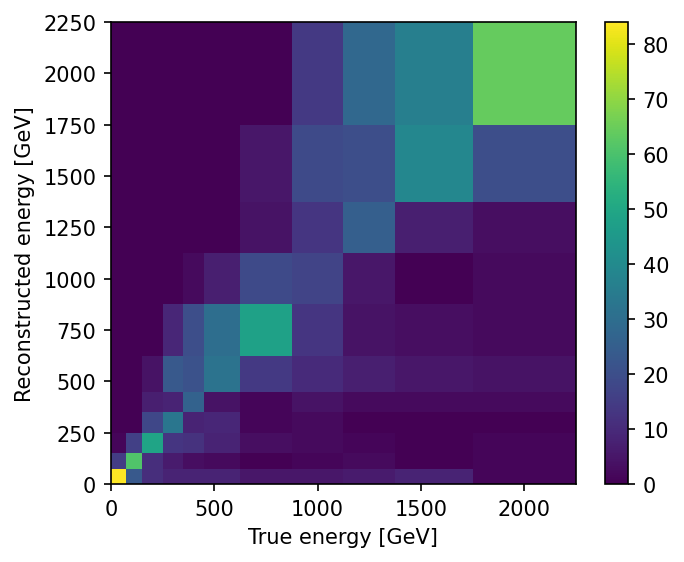

In [48]:
bins = [0,75,150,250,350,450,625,875,1125,1375,1750,2250]
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4), dpi=150)
plt.hist2d(true_e,reco_e_comb,bins = [bins,bins])
plt.ylabel("Reconstructed energy [GeV]")
plt.xlabel("True energy [GeV]")

# plt.colorbar(title="Number of events")
plt.colorbar()

# plt.tight_layout()
# plt.savefig("Energy_reco_z_291(100 events per energy).png",bbox_inches="tight")
# plt.savefig("Energy_reco_z_304(100 events per e), x and y combined.png",bbox_inches="tight")

# plt.xticks(energies)
# plt.yticks(energies)
plt.show()

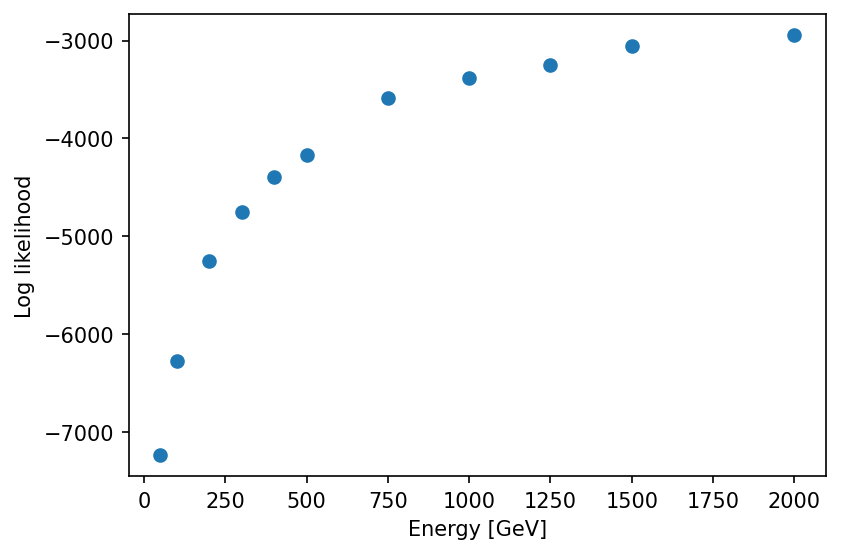

In [20]:
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4), dpi=150)

plt.scatter([50,100,200,300,400,500,750,1000,1250,1500,2000],sum_log)
plt.ylabel("Log likelihood")
plt.xlabel("Energy [GeV]")
# plt.legend(title="Station")
plt.show()